In [36]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Cargamos los 3 modelos  entrenados

In [37]:
# Cargar las imágenes y etiquetas del modelo 1
X_test1 = np.load("C:\\Users\\elsines\\Desktop\\Proyecto_eimc\\imagenes_test1.npy")
y_test1 = np.load('C:\\Users\\elsines\\Desktop\\Proyecto_eimc\\etiquetas_test1.npy')

In [38]:
# Cargar las imágenes y etiquetas del modelo 2
X_test2 = np.load("C:\\Users\\elsines\\Desktop\\Proyecto_eimc\\imagenes_test2.npy")
y_test2 = np.load('C:\\Users\\elsines\\Desktop\\Proyecto_eimc\\etiquetas_test2.npy')

In [39]:
# Cargar las imágenes y etiquetas del modelo 3
X_test3 = np.load("C:\\Users\\elsines\\Desktop\\Proyecto_eimc\\imagenes_test3.npy")
y_test3 = np.load('C:\\Users\\elsines\\Desktop\\Proyecto_eimc\\etiquetas_test3.npy')

In [40]:
ruta_del_modelo1 = "C:\\Users\\elsines\\Desktop\\Proyecto_eimc\\modelo_entrenado.mi_modelo1"

# Cargar el modelo
model1 = load_model(ruta_del_modelo1)

In [41]:
ruta_del_modelo2 = "C:\\Users\\elsines\\Desktop\\Proyecto_eimc\\modelo_entrenado.mi_modelo2"

# Cargar el modelo
model2 = load_model(ruta_del_modelo2)

In [42]:
ruta_del_modelo3 = "C:\\Users\\elsines\\Desktop\\Proyecto_eimc\\modelo_entrenado.mi_modelo3"

# Cargar el modelo
model3 = load_model(ruta_del_modelo3)

# Una vez entrenado mis tres modelos defino una función realiza predicciones utilizando tres modelos diferentes y luego imprime las probabilidades asociadas a ciertas condiciones para una imagen específica. 

In [43]:
predicciones_model1 = model1.predict(X_test1)
predicciones_model2 = model2.predict(X_test2)
predicciones_model3 = model3.predict(X_test3)

23/23 [==============================] - 3s 118ms/step


In [51]:
def pred_model(X, num_im):
    predicciones_model1 = model1.predict(X)[num_im-1]
    predicciones_model2 = model2.predict(X)[num_im-1]
    predicciones_model3 = model3.predict(X)[num_im-1]
    
    print(f"La probabilidad de tener caries es de {predicciones_model1[1]*100:.2f}%")
    print(f"La probabilidad de tener una pieza dental impactada es de {predicciones_model2[0]*100:.2f}%")
    print(f"La probabilidad de tener una pieza dental con lesión periapical es de {predicciones_model3[0]*100:.2f}%")

pred_model(X_test3,3)


23/23 [==============================] - 3s 134ms/step
La probabilidad de tener caries es de 58.30%
La probabilidad de tener una pieza dental impactada es de 48.81%
La probabilidad de tener una pieza dental con lesión periapical es de 12.16%


# Evaluación general del modelo en el conjunto de prueba(De los 3 modelos)

In [45]:
loss1, accuracy1 = model1.evaluate(X_test1, y_test1)
print(f"Pérdida en el conjunto de prueba: {loss1:.4f}")
print(f"Precisión en el conjunto de prueba: {accuracy1 * 100:.2f}%")


23/23 [==============================] - 3s 114ms/step - loss: 0.4954 - accuracy: 0.7564
Pérdida en el conjunto de prueba: 0.4954
Precisión en el conjunto de prueba: 75.64%


In [46]:
loss2, accuracy2 = model2.evaluate(X_test2, y_test2)
print(f"Pérdida en el conjunto de prueba: {loss2:.4f}")
print(f"Precisión en el conjunto de prueba: {accuracy2 * 100:.2f}%")

23/23 [==============================] - 3s 114ms/step - loss: 0.4149 - accuracy: 0.7776
Pérdida en el conjunto de prueba: 0.4149
Precisión en el conjunto de prueba: 77.76%


In [47]:
loss3, accuracy3 = model3.evaluate(X_test3, y_test3)
print(f"Pérdida en el conjunto de prueba: {loss3:.4f}")
print(f"Precisión en el conjunto de prueba: {accuracy3 * 100:.2f}%")

23/23 [==============================] - 3s 113ms/step - loss: 0.2207 - accuracy: 0.9518
Pérdida en el conjunto de prueba: 0.2207
Precisión en el conjunto de prueba: 95.18%


# Curva ROC

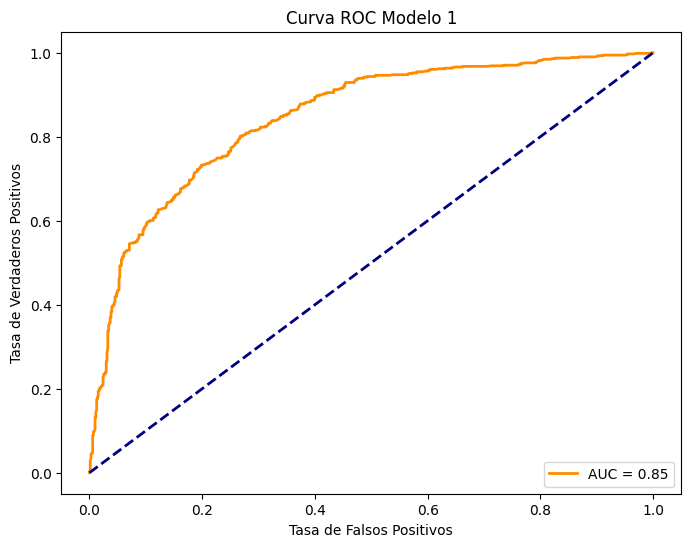

In [48]:
# Calcular la curva ROC Modelo 1
fpr, tpr, thresholds = roc_curve(y_test1.ravel(), predicciones_model1.ravel())

# Calcular el área bajo la curva (AUC)
auc_score = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Modelo 1')
plt.legend(loc="lower right")
plt.savefig('roc_mod1.png')
plt.show()


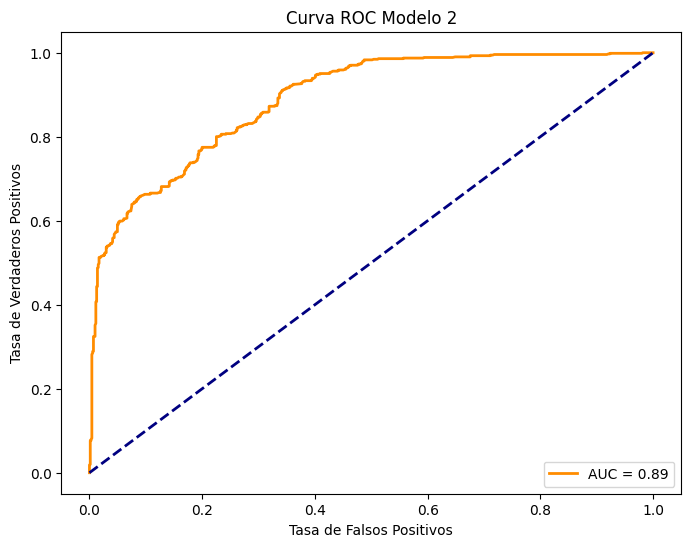

In [49]:
# Calcular la curva ROC Modelo 2
fpr, tpr, thresholds = roc_curve(y_test2.ravel(), predicciones_model2.ravel())

# Calcular el área bajo la curva (AUC)
auc_score = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Modelo 2')
plt.legend(loc="lower right")
plt.savefig('roc_mod2.png')
plt.show()


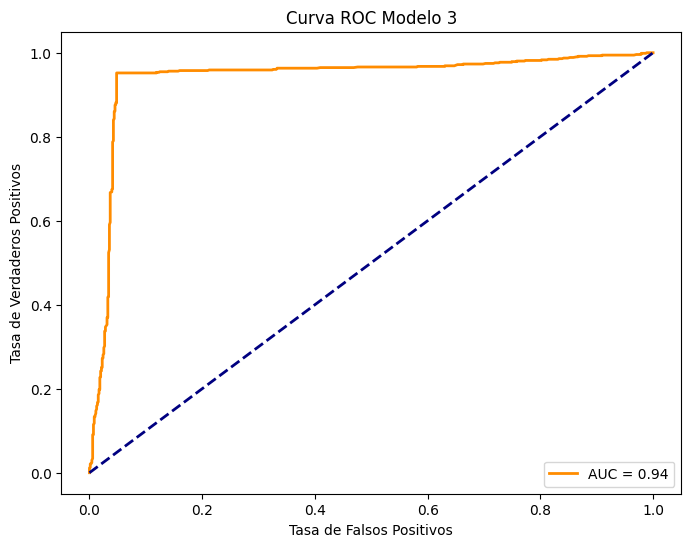

In [50]:
# Calcular la curva ROC Modelo 3
fpr, tpr, thresholds = roc_curve(y_test3.ravel(), predicciones_model3.ravel())

# Calcular el área bajo la curva (AUC)
auc_score = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Modelo 3')
plt.legend(loc="lower right")
plt.savefig('roc_mod3.png')
plt.show()
